In [1]:
# neccessary imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# reading the data
final_df=pd.read_csv('final_df.csv')

In [3]:
# Having a look at the data
final_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported,policy_annual_premium
0,328,48,1000,0,53300,0,5,1,1,2,...,1,6,1,2,3,5,1,1,1,1406.91
1,228,42,2000,5000000,0,0,8,1,0,0,...,2,2,3,1,2,5,0,0,1,1197.22
2,134,29,2000,5000000,35100,0,7,3,2,3,...,3,4,2,1,2,5,0,0,0,1413.14
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,4,3,1,3,3,5,0,0,1,1415.74
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,3,3,3,1,2,1,0,0,0,1583.91


In [4]:
final_df.size

27000

In [5]:
# separating the feature and target columns
x=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported']

In [6]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [7]:
x.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'policy_annual_premium'],
      dtype='object')

In [8]:
x.drop(columns=['age','total_claim_amount'], inplace=True)

In [9]:
# splitting the data for model training

# splitting the data into training and test set

train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=355 )

In [10]:
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,policy_annual_premium
65,254,500,0,35700,0,6,3,2,2,13720,...,6,9,2,2,3,2,4,1,0,1362.87
244,95,1000,0,0,-70300,3,1,1,2,640,...,5,4,2,3,1,1,1,1,0,773.99
595,56,500,0,0,-28800,13,1,1,2,0,...,1,14,4,1,1,3,5,1,1,1533.07
873,322,2000,0,0,-46000,18,1,0,2,7680,...,7,4,4,1,1,3,4,0,1,1277.12
631,147,1000,6000000,0,-48400,2,2,1,2,9760,...,5,6,6,2,1,4,2,0,0,1439.90


In [11]:
num_df=train_x[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [12]:
num_df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [13]:
print(train_x.shape)
print(num_df.shape)

(750, 24)
(750, 12)


In [14]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [15]:
scaled_data=scaler.fit_transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns,index=train_x.index)
scaled_num_df.shape

(750, 12)

In [16]:
scaled_num_df.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [17]:
train_x.drop(columns=scaled_num_df.columns, inplace=True)

c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
train_x.shape

(750, 12)

In [19]:
train_x.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,policy_annual_premium
65,1.0,0,6,9,2,2,3,2,4,1,0,1362.87
244,2.5,1,5,4,2,3,1,1,1,1,0,773.99
595,1.0,1,1,14,4,1,1,3,5,1,1,1533.07
873,2.5,0,7,4,4,1,1,3,4,0,1,1277.12
631,5.0,0,5,6,6,2,1,4,2,0,0,1439.90


In [20]:
train_x=pd.concat([scaled_num_df,train_x],axis=1)

In [21]:
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,policy_annual_premium
65,0.435244,-1.037803,-0.468878,0.385876,0.975789,-0.819548,1.162385,1.271286,0.43186,1.285251,...,6,9,2,2,3,2,4,1,0,1362.87
244,-0.930728,-0.209769,-0.468878,-0.904442,-1.546393,-1.248282,-0.812221,0.034626,0.43186,-1.393623,...,5,4,2,3,1,1,1,1,0,773.99
595,-1.265778,-1.037803,-0.468878,-0.904442,-0.057480,0.180830,-0.812221,0.034626,0.43186,-1.524700,...,1,14,4,1,1,3,5,1,1,1533.07
873,1.019433,1.446300,-0.468878,-0.904442,-0.674572,0.895386,-0.812221,-1.202033,0.43186,0.048217,...,7,4,4,1,1,3,4,0,1,1277.12
631,-0.483995,-0.209769,2.171861,-0.904442,-0.760678,-1.391193,0.175082,0.034626,0.43186,0.474215,...,5,6,6,2,1,4,2,0,0,1439.90


In [22]:
train_x.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
policy_csl                     0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
property_damage                0
police_report_available        0
policy_annual_premium          0
dtype: int64

In [23]:
# first using the Support vector classifier for model training
from sklearn.svm import SVC
sv_classifier=SVC()

In [24]:
sv_classifier=SVC()
y_pred = sv_classifier.fit(train_x, train_y).predict(test_x)

sc=accuracy_score(test_y,y_pred)
sc

0.728

In [25]:
y_pred = sv_classifier.fit(train_x, train_y).predict(test_x)

In [26]:
sc=accuracy_score(test_y,y_pred)
sc

0.728

In [27]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       182
           1       0.00      0.00      0.00        68

    accuracy                           0.73       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.53      0.73      0.61       250



c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(train_x, train_y)
y_pred = xgb.predict(test_x)
xgb_ac=accuracy_score(test_y,y_pred)
xgb_ac

0.776

In [29]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       182
           1       0.70      0.31      0.43        68

    accuracy                           0.78       250
   macro avg       0.74      0.63      0.64       250
weighted avg       0.76      0.78      0.74       250



In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
#param_grid = {"kernel": ['rbf','sigmoid'],
#             "C":[0.1,0.5,1.0],
#             "random_state":[0,100,200,300]}

In [32]:
#grid = GridSearchCV(estimator=sv_classifier, param_grid=param_grid, cv=5,  verbose=3)

In [33]:
#grid.fit(train_x, train_y)

In [34]:
#from xgboost import XGBClassifier

In [35]:
#xgb=XGBClassifier()

In [36]:
#xgb.fit(train_x, train_y)

In [37]:
#y_pred = xgb.predict(test_x)


In [38]:
#ac2=accuracy_score(test_y,y_pred)
#ac2

In [39]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       182
           1       0.70      0.31      0.43        68

    accuracy                           0.78       250
   macro avg       0.74      0.63      0.64       250
weighted avg       0.76      0.78      0.74       250



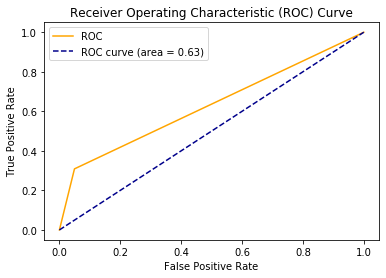

In [40]:

auc = roc_auc_score(test_y,y_pred)

fpr, tpr, thresholds = roc_curve(test_y, y_pred)
                    
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [41]:
#param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
#                               "max_depth": range(2, 10, 1)}

            #Creating an object of the Grid Search class
#grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)

In [42]:
#finding the best parameters
#grid.fit(train_x, train_y)

In [43]:
#grid.best_estimator_

In [44]:
# To  find the parameters givingmaximum accuracy
#grid.best_params_

In [45]:
# To  find the parameters givingmaximum accuracy
#grid.best_params_


# Create new model using the same parameters
#new_model=XGBClassifier(learning_rate= 0.1, max_depth= 2, n_estimators= 50, criterion='gini')
#new_model.fit(train_x, train_y)
#y_pred_new = new_model.predict(test_x)
#accuracy_new = accuracy_score(test_y,y_pred_new )
#accuracy_new

In [46]:
#y_pred_new = new_model.predict(test_x)
#accuracy_new = accuracy_score(test_y,y_pred_new )
#accuracy_new

In [47]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
knn_ac=accuracy_score(test_y,y_pred)
knn_ac

0.712

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       182
           1       0.17      0.01      0.03        68

    accuracy                           0.71       250
   macro avg       0.45      0.49      0.43       250
weighted avg       0.57      0.71      0.61       250



## Clustering

In [49]:
x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,policy_annual_premium
0,328,1000,0,53300,0,5,1,1,2,6510,...,6,1,6,1,2,3,5,1,1,1406.91
1,228,2000,5000000,0,0,8,1,0,0,780,...,6,2,2,3,1,2,5,0,0,1197.22
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,7,3,4,2,1,2,5,0,0,1413.14
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,7,4,3,1,3,3,5,0,0,1415.74
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,5,3,3,3,1,2,1,0,0,1583.91


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

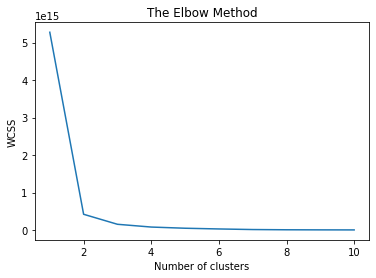

In [51]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

In [52]:
kmeans = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 

In [53]:
#cls means Cluster 
x['cls'] = y_kmeans

In [54]:
x['fraud_reported']=final_df['fraud_reported']

In [55]:
Cls_data = x
Cls_data.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,policy_annual_premium,cls,fraud_reported
0,328,1000,0,53300,0,5,1,1,2,6510,...,6,1,2,3,5,1,1,1406.91,0,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,2,3,1,2,5,0,0,1197.22,1,1
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,4,2,1,2,5,0,0,1413.14,1,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,3,1,3,3,5,0,0,1415.74,1,1
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,3,3,1,2,1,0,0,1583.91,1,0


In [56]:
import seaborn as sns

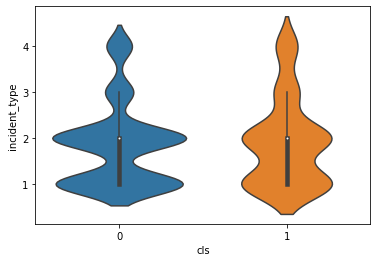

In [57]:
sns.violinplot(x=Cls_data['cls'],y=Cls_data['incident_type'],data = Cls_data)

In [58]:
# cls means Cluster
violin = Cls_data.drop(columns = ['cls','fraud_reported'])
cls = x['cls']

c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

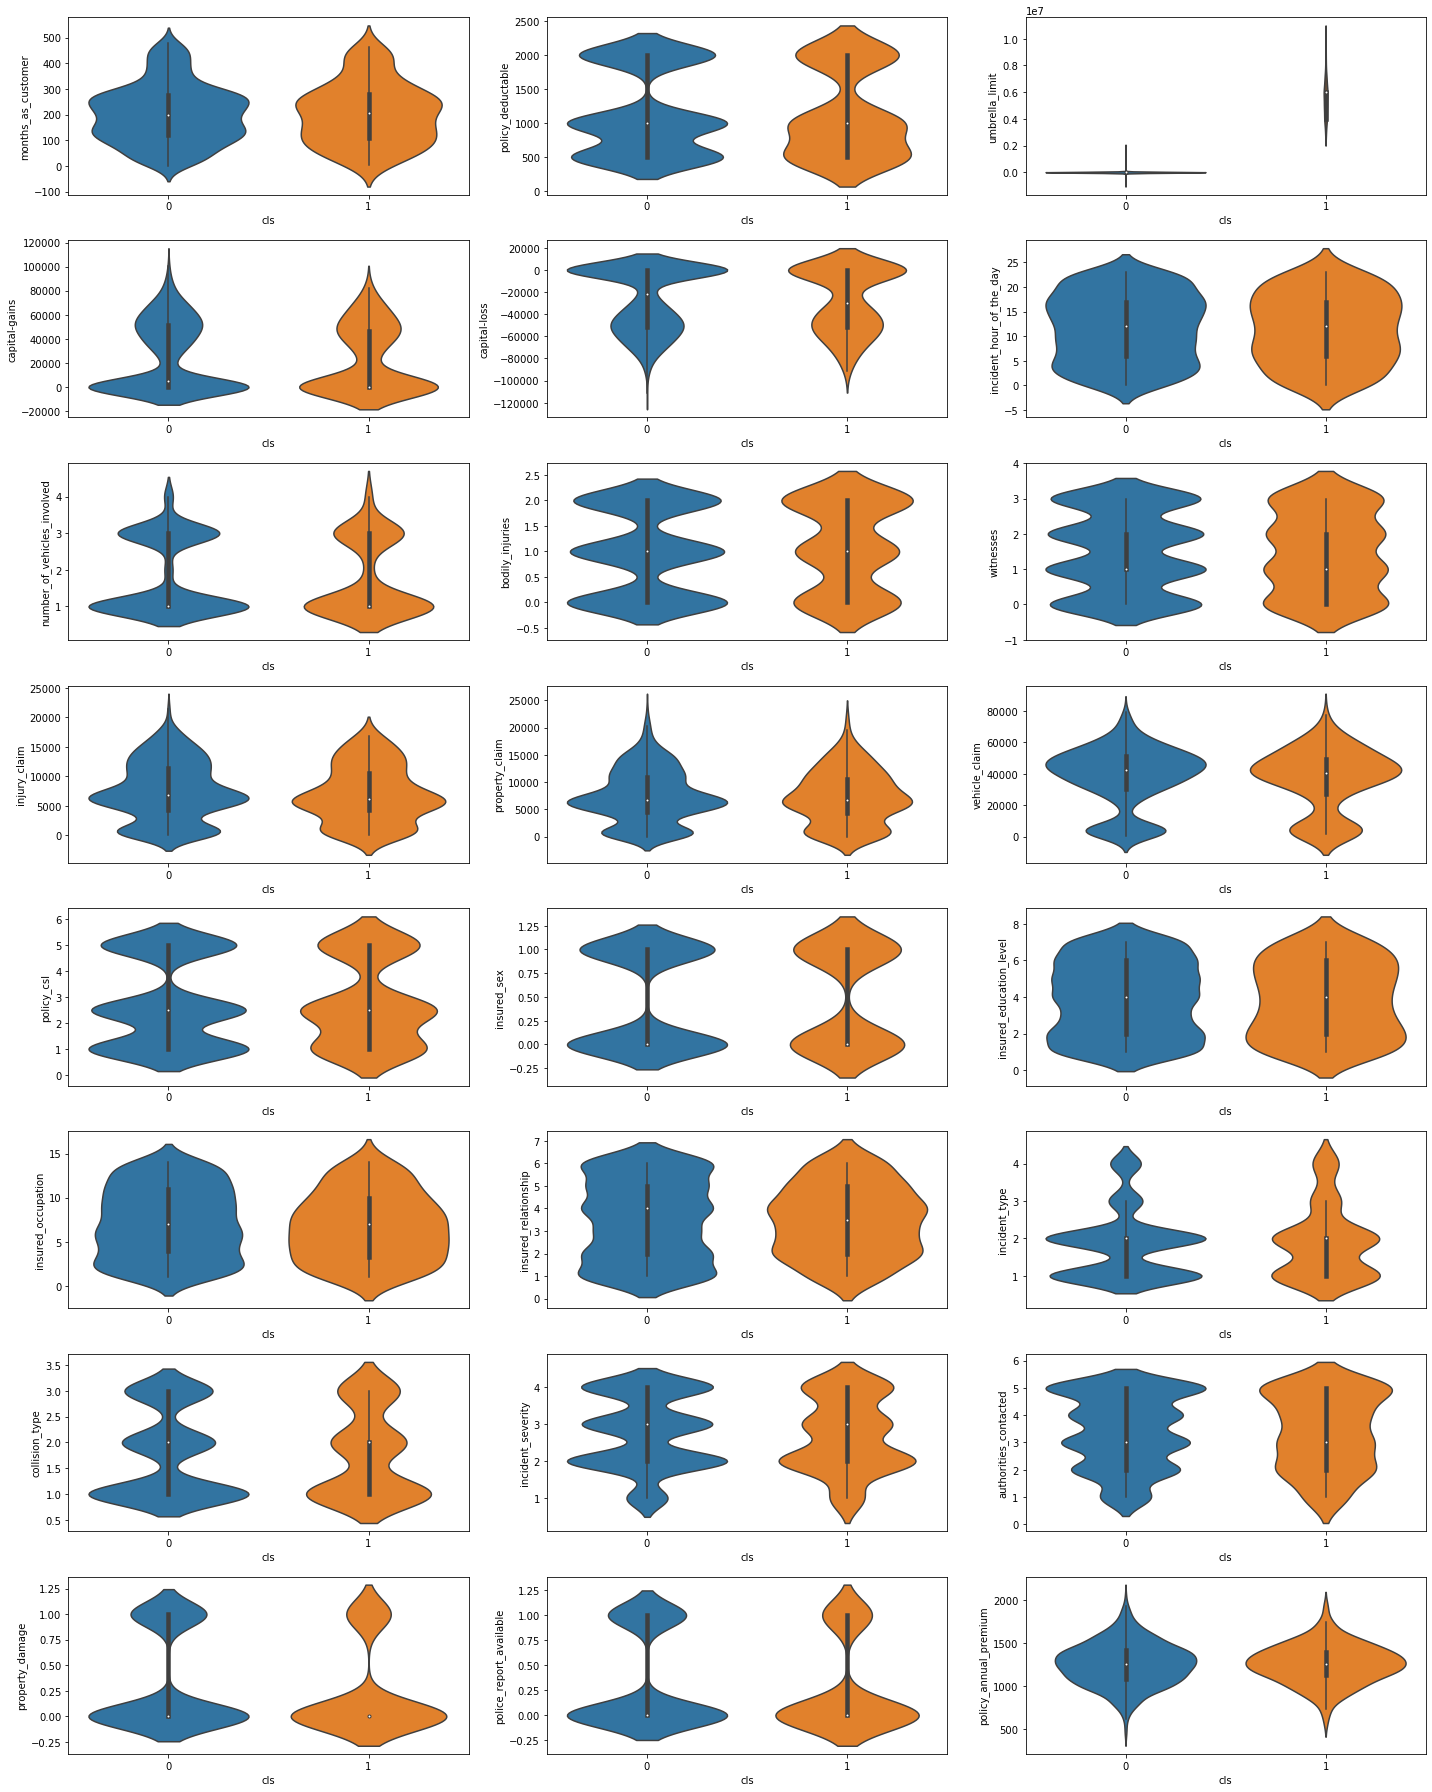

In [59]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in violin:
    if plotnumber<=24 :
        ax = plt.subplot(8,3,plotnumber)
        sns.violinplot(cls,violin[column])
    plotnumber+=1
plt.tight_layout()

In [60]:
x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,policy_annual_premium,cls,fraud_reported
0,328,1000,0,53300,0,5,1,1,2,6510,...,6,1,2,3,5,1,1,1406.91,0,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,2,3,1,2,5,0,0,1197.22,1,1
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,4,2,1,2,5,0,0,1413.14,1,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,3,1,3,3,5,0,0,1415.74,1,1
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,3,3,1,2,1,0,0,1583.91,1,0


In [61]:
#data=pd.concat([x,final_df['fraud_reported']], axis=1)

In [62]:
Cls_data.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,policy_annual_premium,cls,fraud_reported
0,328,1000,0,53300,0,5,1,1,2,6510,...,6,1,2,3,5,1,1,1406.91,0,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,2,3,1,2,5,0,0,1197.22,1,1
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,4,2,1,2,5,0,0,1413.14,1,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,3,1,3,3,5,0,0,1415.74,1,1
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,3,3,1,2,1,0,0,1583.91,1,0


### Cluster wise data

In [63]:
cl_0=Cls_data[Cls_data['cls']==0]
cl_0.shape

(802, 26)

In [64]:
cl_1=Cls_data[Cls_data['cls']==1]
cl_1.shape

(198, 26)

### Model Building

### Cluster 1 Model Building

In [65]:
#cluster1 denoted by 0 in data
x0=cl_0.drop(['fraud_reported','cls'],axis=1)
y0=cl_0['fraud_reported']

In [66]:
#Train Test Split 
train_xx,test_xx,train_yy,test_yy=train_test_split(x0,y0,test_size=0.25, random_state=355 )

### SVC

In [67]:
sv_classifier_c0=SVC()
yy_pred = sv_classifier_c0.fit(train_xx, train_yy).predict(test_xx)
svc_ac0=accuracy_score(test_yy,yy_pred)

print("The accuracy score is : ", svc_ac0)

The accuracy score is :  0.7562189054726368


In [68]:
from sklearn.metrics import classification_report
print(classification_report(test_yy,yy_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       152
           1       0.00      0.00      0.00        49

    accuracy                           0.76       201
   macro avg       0.38      0.50      0.43       201
weighted avg       0.57      0.76      0.65       201



c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001]}

In [71]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [72]:
grid.fit(train_xx, train_yy)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    8.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [73]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [74]:
model_new=SVC(C=0.1, gamma=1)
model_new.fit(train_xx, train_yy)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [75]:
accuracy_score(test_yy,model_new.predict(test_xx))

0.7562189054726368

### XGBClassifier

In [76]:
xgb_c0=XGBClassifier()
xgb_c0.fit(train_xx, train_yy)
yy_pred = xgb.predict(test_xx)
xgb_ac0=accuracy_score(test_yy,yy_pred)
xgb_ac0

0.7711442786069652

In [77]:
from sklearn.metrics import classification_report
print(classification_report(test_yy,yy_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       152
           1       0.56      0.29      0.38        49

    accuracy                           0.77       201
   macro avg       0.68      0.61      0.62       201
weighted avg       0.74      0.77      0.74       201



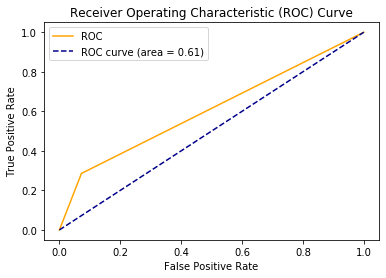

In [78]:

auc = roc_auc_score(test_yy,yy_pred)

fpr, tpr, thresholds = roc_curve(test_yy, yy_pred)
                    
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### LogisticRegression

In [79]:
from sklearn.linear_model  import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_xx, train_yy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
pred = log_reg.predict(test_xx)
log_reg_ac0=accuracy_score(test_yy,pred)
log_reg_ac0

0.7512437810945274

In [81]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       182
           1       0.17      0.01      0.03        68

    accuracy                           0.71       250
   macro avg       0.45      0.49      0.43       250
weighted avg       0.57      0.71      0.61       250



In [82]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_xx, train_yy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
clf.score(train_xx, train_yy)

1.0

In [84]:
# accuracy of our classification tree
DS_ac0=clf.score(test_xx, test_yy)
DS_ac0

0.7164179104477612

### Cluster 2 Model Building

In [85]:
#cluster2 denoted by 1 in data
x1=cl_1.drop(['fraud_reported','cls'],axis=1)
y1=cl_1['fraud_reported']

In [86]:
#Train Test Split 
train_x,test_x,train_y,test_y=train_test_split(x1,y1,test_size=0.25, random_state=355 )

### SVC

In [87]:
sv_classifier=SVC()
y_pred = sv_classifier.fit(train_x, train_y).predict(test_x)
svc_ac1=accuracy_score(test_y,y_pred)
svc_ac1

0.72

In [88]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        36
           1       0.00      0.00      0.00        14

    accuracy                           0.72        50
   macro avg       0.36      0.50      0.42        50
weighted avg       0.52      0.72      0.60        50



c:\users\laptop\anaconda3\envs\insurancefraud_detection\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
xgb_c1=XGBClassifier()
xgb_c1.fit(train_x, train_y)
y_pred = xgb.predict(test_x)
xgb_ac1=accuracy_score(test_y,y_pred)

print("The accuracy score is : ", xgb_ac1)

The accuracy score is :  0.72


In [90]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        36
           1       0.50      0.14      0.22        14

    accuracy                           0.72        50
   macro avg       0.62      0.54      0.53        50
weighted avg       0.67      0.72      0.66        50



In [92]:
#param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
#                               "max_depth": range(2, 10, 1)}

            #Creating an object of the Grid Search class
#grid = GridSearchCV(estimator=xgb_c1, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)

In [93]:
#finding the best parameters
#grid.fit(train_x, train_y)

In [94]:
#grid.best_estimator_

In [95]:
# To find the parameters givingmaximum accuracy
#grid.best_params_

In [96]:
# Create new model using the same parameters
#new_model=XGBClassifier( max_depth= 2, n_estimators= 50, criterion='gini')
#new_model.fit(train_x, train_y)
#y_pred_new = new_model.predict(test_x)
#accuracy_new = accuracy_score(test_y,y_pred_new )
#accuracy_new

In [97]:
import pickle
# Writing different model files to file
with open('modelClusterning', 'wb') as f:
    pickle.dump(kmeans,f)

with open( 'modelForPrediction_c0.sav', 'wb') as f:
    pickle.dump(xgb_c0,f)

with open('modelForPrediction_c1', 'wb') as f:
    pickle.dump(sv_classifier,f)
